## Build and Deploy a Natural Language Processing (NLP) Model to classify Sentiments about Amazon's Prime Videos

+ **Group:** Group 1
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 31/03/2025 23.59 Hours
+ **Instructor name:** Samuel Karu

## Project Summary

### Data Understanding

-
-
-
-


### Problem Statement
-
-
-
-


### Business Objectives


## Requirements to Meet Objectives

### 1. Load the Data
Use Pandas to load the dataset and get a sense of what is in the dataset by visually inspecting the data.

### 2. Perform Data Cleaning with nltk
- Use Regular Expressions (REGEX) to remove irrelevant information such as punctuations and numbers
- Convert all text to lowercase to ensure uniformity
- Apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- Remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). This helped in focusing on more meaningful words in the text, leading to better performance of NLP models.
- Tokenize the cleaned text

### 3. Perform Exploratory Data Analysis
  - Analyze the positive and negative sentiments by company.
 - Analyze the distribution of sentiment labels (positive, negative,neutral) using bar charts and value counts to understand class balance.
 - Visualize the top 10 most common words in the data set.
 - Created word clouds for positive, negative and neutral tweets to visualize most common words in each sentiment class

### 4. Vectorize the text data with TFidfVectorizer
- All data must be in numeric form in order to fit a scikit-learn model. We will use Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer from sklearn.feature_extraction.text to convert the text data into a vectorized format.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones.

 ### 5. Iteratively Build and Evaluate Baseline and Advanced  Models
- Using Pipelines, build and iteratively tune baseline SVM and Multinomial Naive Bayes Models
- Build and Train one or more Advanced  models and compare the results with those of the tuned baseline models


 ### 6. Evaluation
Evaluate model performance using the following metrics:

- Classification_report from Scikit-learn : This metric provides a convenient way to generate detailed performance metrics for classification tasks. It provides a summary of key metrics for each class, including accuracy, precision, recall, and F1-score
- confusion_matrix: It provides a visual summary of the prediction results by showing the count of true positives, true negatives, false positives, and false negatives.

### 7. Deploy the Model
- Flask API to serve sentiment and summarization models.
Front-end integration for an interactive review analysis dashboard.

### 8. Next Steps
Using the results obtained from the evaluation process make recommendations on:-

### Key Technologies Used

- Python (Pandas, NumPy, NLTK, Scikit-Learn, TensorFlow, PyTorch)
- NLP Models (TF-IDF, LSTM, BERT, BART)
- Machine Learning (MultinomialNB, SVM)
- Data Visualization (Matplotlib, Seaborn, WordCloud)
- Flask (For web deployment)
- Cloud Deployment (Optional: AWS, Heroku, or Streamlit)

## Expected Outcomes

- Accurate sentiment classification of Amazon Prime Video reviews.
- Concise review summaries to assist users in decision-making.
- Scalable and deployable Flask-based API for real-time analysis.

## Future Enhancements

- Aspect-Based Sentiment Analysis – Identify sentiment for specific aspects (e.g., content quality, streaming experience).
- Emotion Detection – Extend sentiment analysis to classify emotions like joy, anger, and frustration.
- Personalized Recommendations – Suggest movies/shows based on sentiment and user preferences.


### 1.1 Load and Clean the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from bs4 import BeautifulSoup
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import spacy
from spacy import displacy
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Load the data as a DataFrame and display the first 5 columns
video_df = pd.read_csv("/content/drive/MyDrive/capstone/prime_videos.csv", encoding='ISO-8859-1')

In [4]:
# check the first 5 rows
video_df.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",B013488XFS,B013488XFS,2015-08-24 03:07:17.000,True,Prime Video,Sneaky Pete,4.6,56658.0,['A\xa0con man (Giovanni Ribisi) on the run fr...,NaN,Suspense
1,5,Five Stars,My Kiddos LOVE this show!!,B00CB6VTDS,B00CB6VTDS,2016-04-19 21:16:50.000,True,Prime Video,Creative Galaxy,4.8,6403.0,['Follow the adventures of Arty and his sideki...,NaN,Kids
2,5,What Love Is...,"...isn't always how you expect it to be, but w...",B001H1SVZC,B001H1SVZC,2020-05-28 04:13:47.074,True,Prime Video,NaN,4.5,389.0,NaN,NaN,NaN
3,5,QUIRKY TURNS TO HEARTSTRINGS,As you learn about the very unique characters ...,B06WVW16WY,B06WVW16WY,2020-04-16 01:15:47.540,True,Prime Video,NaN,4.8,1966.0,NaN,NaN,NaN
4,5,Way better than the harsh reviews.,Our family loved the film. We have kids and th...,B07RXM26FG,B07RXM26FG,2019-09-29 05:17:12.700,True,Prime Video,NaN,4.5,57962.0,NaN,NaN,NaN


In [5]:
# check the last 3 rows to ensure uniformity
video_df.tail(3)

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories
233607,5,Another Instant Will Ferrell Classic!!!,Will Ferrell has always been one of my favorit...,B00V9US0TI,B00V9US0TI,2015-03-28 02:27:19.000,False,Prime Video,NaN,4.6,13355.0,NaN,NaN,NaN
233608,5,Scary Movie 5 is Easily One of the Best in the...,I grew up with the Scary Movie franchise. I've...,B00EAZL6HC,B00EAZL6HC,2013-08-20 02:43:44.000,False,Prime Video,NaN,4.3,3125.0,NaN,NaN,NaN
233609,4,Pretty Good!!!,This movie was a lot better than I had expecte...,B002VXKYCS,B002VXKYCS,2009-12-31 01:25:26.000,False,Prime Video,NaN,4.8,5742.0,NaN,NaN,NaN


In [6]:
# check the shape of the data
video_df.shape

print(f"This data set consists of {video_df.shape[0]} rows")
print(f"This data set consists of {video_df.shape[1]} columns")

This data set consists of 233610 rows
This data set consists of 14 columns


In [7]:
# Get column names
video_df.columns

Index(['rating', 'title_x', 'text', 'asin', 'parent_asin', 'timestamp',
       'verified_purchase', 'main_category', 'title_y', 'average_rating',
       'rating_number', 'description', 'price', 'categories'],
      dtype='object')

In [8]:
#check for missing values
video_df.isna().sum()

,0
rating,0
title_x,24
text,31
asin,0
parent_asin,0
timestamp,0
verified_purchase,0
main_category,0
title_y,199810
average_rating,3


In [9]:
video_df.duplicated().sum()

np.int64(538)

In [10]:
# Rename and dropsome columns

video_df = video_df.rename(columns={'text':'review_text','title_x':'rating_desc', 'title_y':'movie_title'})
video_df = video_df.drop(columns=['asin','parent_asin','rating_number','main_category'])

print(video_df.columns)

Index(['rating', 'rating_desc', 'review_text', 'timestamp',
       'verified_purchase', 'movie_title', 'average_rating', 'description',
       'price', 'categories'],
      dtype='object')


columns have been renamed, and columns that are not necessary for analysis have been dropped

In [11]:
# Get column attributes
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233610 entries, 0 to 233609
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             233610 non-null  int64  
 1   rating_desc        233586 non-null  object 
 2   review_text        233579 non-null  object 
 3   timestamp          233610 non-null  object 
 4   verified_purchase  233610 non-null  bool   
 5   movie_title        33800 non-null   object 
 6   average_rating     233607 non-null  float64
 7   description        33800 non-null   object 
 8   price              24165 non-null   float64
 9   categories         33800 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 16.3+ MB


The data types are appropriate for the columns.However, there aresignificant NULL values in the movie_title,description,price and categories columns. Since one of our objectives is to analyze sentiment by genre, we need the categories column not to be null. We will drop all the rows in the categories columns with NULL values.

In [12]:
# replave NaN in the 'price' column with the mean
# drop all rows with NaN values in the 'categories','description' and 'movie_title' columns

video_df['price'].fillna(video_df['price'].mean(), inplace=True)

video_df = video_df.dropna(subset=['categories','description','movie_title'])

# check for the info
video_df.info()

print("\nvideo_df.shape:", video_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 33800 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             33800 non-null  int64  
 1   rating_desc        33798 non-null  object 
 2   review_text        33798 non-null  object 
 3   timestamp          33800 non-null  object 
 4   verified_purchase  33800 non-null  bool   
 5   movie_title        33800 non-null  object 
 6   average_rating     33799 non-null  float64
 7   description        33800 non-null  object 
 8   price              33800 non-null  float64
 9   categories         33800 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.6+ MB

video_df.shape: (33800, 10)


The NULL values from the specified columnsand the NaN in the 'price' column have been updated with the average price. However, there are still a few lingering NaN values, which will be dropped in the cell below

In [13]:
# drop the remaining nulls
video_df = video_df.dropna()

# check for the info
video_df.info()

print("\nvideo_df.shape:", video_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 33796 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             33796 non-null  int64  
 1   rating_desc        33796 non-null  object 
 2   review_text        33796 non-null  object 
 3   timestamp          33796 non-null  object 
 4   verified_purchase  33796 non-null  bool   
 5   movie_title        33796 non-null  object 
 6   average_rating     33796 non-null  float64
 7   description        33796 non-null  object 
 8   price              33796 non-null  float64
 9   categories         33796 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 2.6+ MB

video_df.shape: (33796, 10)


All the NaN values have been dropped.

In [14]:
# Remove rows where 'categories' contain '['
video_df = video_df[~video_df['categories'].str.contains('[', regex=False)]
video_df['categories'].value_counts()

,count
categories,
Suspense,7518
Comedy,7507
Drama,7075
Science Fiction,3945
Documentary,1604
Fantasy,802
Action,783
Unscripted,753
Historical,567


In [15]:
video_df.duplicated().sum()

np.int64(73)

In [16]:
video_df = video_df.drop_duplicates()
video_df.shape

(33552, 10)

In [17]:
#Change 'timestamp' data type to datetime

video_df['timestamp'] = pd.to_datetime(video_df['timestamp'])

video_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33552 entries, 0 to 233601
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             33552 non-null  int64         
 1   rating_desc        33552 non-null  object        
 2   review_text        33552 non-null  object        
 3   timestamp          33552 non-null  datetime64[ns]
 4   verified_purchase  33552 non-null  bool          
 5   movie_title        33552 non-null  object        
 6   average_rating     33552 non-null  float64       
 7   description        33552 non-null  object        
 8   price              33552 non-null  float64       
 9   categories         33552 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.6+ MB


'timestamp'column is now in a datetime64 format suitable for time series analysis.

In [18]:
# Create 'sentiments' column
def classify_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

video_df['sentiment'] = video_df['rating'].apply(classify_sentiment)

video_df['sentiment'].value_counts()

,count
sentiment,
positive,25094
negative,4917
neutral,3541


- The sentiments are `largely Positive` with a `fewer neutral and negative` sentiments. It would be of interest to Amazon and other content creators to determine which titles and genres have neutral or negative sentiments

In [19]:
video_df['verified_purchase'].value_counts()

,count
verified_purchase,
True,26984
False,6568


There appears to be rows where the verifiied purchase is false, meaning the purchase was not verified. We will drop all those rows.


In [20]:
# Drop rows where verified_purchase  is false

video_df = video_df.drop(video_df[video_df['verified_purchase']==False].index)
video_df.shape

(26984, 11)

New shape indicates that the unverified purchases have been dropped

In [21]:
video_df.describe()

,rating,timestamp,average_rating,price
count,26984.000000,26984,26984.000000,26984.000000
mean,4.113252,2017-09-06 06:58:19.671578368,4.430559,14.324602
min,1.000000,2007-08-17 05:48:51,1.000000,0.000000
25%,4.000000,2016-01-23 20:04:25.500000,4.300000,10.790000
50%,5.000000,2016-12-29 20:55:58,4.600000,14.570061
75%,5.000000,2019-08-06 17:50:35.622000128,4.700000,14.990000
max,5.000000,2023-03-17 20:13:30.343000,5.000000,81.990000
std,1.266040,NaN,0.434535,5.662028


`rating` and `average_rating` both show a bias towards high values, indicating most content receive favorable evaluations. The time stamp indicates we have data from 2007 to 2023 - a period of over 5 years. WE can therefore analyze sentiments over time.

`price` shows a concentration around mid-range values (~14.5), with outliers suggesting a few premium-priced items. The minimum price of 0 is not surprising as Amazom Prime offers a selection of movies and TV shows that are free to watch with a Prime Membership.Additionally, Amazon also has some free content available with ads, which doesn't require a Prime membership.

In [22]:
video_df['sentiment'].value_counts()

,count
sentiment,
positive,20375
negative,3715
neutral,2894


In [23]:
# Make a copy of the cleaned data set before text pre-processing and EDA
data = video_df.copy()
data.head(3)

,rating,rating_desc,review_text,timestamp,verified_purchase,movie_title,average_rating,description,price,categories,sentiment
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",2015-08-24 03:07:17,True,Sneaky Pete,4.6,['A\xa0con man (Giovanni Ribisi) on the run fr...,14.570061,Suspense,positive
1,5,Five Stars,My Kiddos LOVE this show!!,2016-04-19 21:16:50,True,Creative Galaxy,4.8,['Follow the adventures of Arty and his sideki...,14.570061,Kids,positive
14,4,Four Stars,It was pretty good. Had some pretty comical sc...,2016-09-16 18:39:49,True,Seven Girlfriends,3.2,"[""Jesse has never had a problem finding a gir...",12.990000,Comedy,positive


In [24]:
data = data.reset_index(drop=True)

### 1.2 Text Transformations

In this section, we will prepare the video_df for EDA and Modeling.
- Join the text in rating_desc and review_text into a new column called reviews
- We will start by dropping columns that have no analytical values like description,verified_purchase.
- Then we will prepare the review_text feature column for vectorization,This will involve:-
  - removing unnessary text and symbols numbers, punctuation and symbols that carry no meaning to the sentiments.
  - convert all text to lowercase to ensure uniformity
  - apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
  - remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.).
  - tokenize the cleaned text into individual words

In [25]:
# Join the text in 'rating_desc' and 'review_text' into a new column called 'reviews'
data['reviews'] = data['rating_desc'] + '  ' + data['review_text']
data.head(2)

,rating,rating_desc,review_text,timestamp,verified_purchase,movie_title,average_rating,description,price,categories,sentiment,reviews
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",2015-08-24 03:07:17,True,Sneaky Pete,4.6,['A\xa0con man (Giovanni Ribisi) on the run fr...,14.570061,Suspense,positive,"Five Stars Amazon, please buy the show! I'm h..."
1,5,Five Stars,My Kiddos LOVE this show!!,2016-04-19 21:16:50,True,Creative Galaxy,4.8,['Follow the adventures of Arty and his sideki...,14.570061,Kids,positive,Five Stars My Kiddos LOVE this show!!


The 2 columns have been joined into one column. This will ensire we get the full context of the reviewer's sentiment

In [26]:
# Drop columns that have no anlytical and modeling use

data = data.drop(columns=['verified_purchase','description','rating_desc','average_rating','review_text'])

data.columns

Index(['rating', 'timestamp', 'movie_title', 'price', 'categories',
       'sentiment', 'reviews'],
      dtype='object')

In [27]:
# Reorder columns
columns_order = ['rating', 'timestamp', 'movie_title', 'price',
       'categories','reviews','sentiment']
data = data[columns_order]

print(data.columns)

Index(['rating', 'timestamp', 'movie_title', 'price', 'categories', 'reviews',
       'sentiment'],
      dtype='object')


In [28]:
data.head(3)

,rating,timestamp,movie_title,price,categories,reviews,sentiment
0,5,2015-08-24 03:07:17,Sneaky Pete,14.570061,Suspense,"Five Stars Amazon, please buy the show! I'm h...",positive
1,5,2016-04-19 21:16:50,Creative Galaxy,14.570061,Kids,Five Stars My Kiddos LOVE this show!!,positive
2,4,2016-09-16 18:39:49,Seven Girlfriends,12.990000,Comedy,Four Stars It was pretty good. Had some prett...,positive


Columns are reordered and will proceed to tokenize the reviews column

In [29]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [30]:
data['reviews'] = data['reviews'].apply(strip_html_tags)
data['reviews'][:3]

,reviews
0,"Five Stars Amazon, please buy the show! I'm h..."
1,Five Stars My Kiddos LOVE this show!!
2,Four Stars It was pretty good. Had some prett...


In [31]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove stop words
    stop_words = set(stopwords.words('english'))

    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [32]:
# Apply the preprocessing function to the 'reviews'
data["clean_review"] = data["reviews"].apply(preprocess_text)

# verify the changes

data['clean_review'].head()

,clean_review
0,five star amazon please buy show im hooked
1,five star kiddos love show
2,four star wa pretty good pretty comical scene ...
3,ok love story bit slow unsatisfying ending
4,trash movie based solely incest storyline garb...


The 'reviews' column has now been transformed into lowercase strings without numbers and symbols. The next step is to tokenize the cleaned text. Tokenization is the process of converting the tweets into individual words.

In [33]:

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens


In [34]:
# Create a new column for the tokenized text
data['reviews_tokenized'] = data['reviews'].apply(tokenize_text)

data['reviews_tokenized'].head(3)

,reviews_tokenized
0,"[Five, Stars, Amazon, ,, please, buy, the, sho..."
1,"[Five, Stars, My, Kiddos, LOVE, this, show, !, !]"
2,"[Four, Stars, It, was, pretty, good, ., Had, s..."


The reviews have been tokenized and we can now use these words to perform various EDA tasks.

In [35]:
data.head(3)

,rating,timestamp,movie_title,price,categories,reviews,sentiment,clean_review,reviews_tokenized
0,5,2015-08-24 03:07:17,Sneaky Pete,14.570061,Suspense,"Five Stars Amazon, please buy the show! I'm h...",positive,five star amazon please buy show im hooked,"[Five, Stars, Amazon, ,, please, buy, the, sho..."
1,5,2016-04-19 21:16:50,Creative Galaxy,14.570061,Kids,Five Stars My Kiddos LOVE this show!!,positive,five star kiddos love show,"[Five, Stars, My, Kiddos, LOVE, this, show, !, !]"
2,4,2016-09-16 18:39:49,Seven Girlfriends,12.990000,Comedy,Four Stars It was pretty good. Had some prett...,positive,four star wa pretty good pretty comical scene ...,"[Four, Stars, It, was, pretty, good, ., Had, s..."


The reviews have been tokenized and we are now ready to perform EDA!

In [36]:
# save clean dataset
data.to_csv('/content/drive/MyDrive/capstone/reviews.csv', index=False)

### 2.1 Exploratory Data Analysis
In this section we will:

- **Sentiment Distribution:** Use bar charts and value counts to understand the class balance of sentiment labels (positive, negative, neutral). This helps identify any class imbalances.
- **Length Analysis:** Visualize the ditribution of review lengths (word counts) across sentiment classes. This helps identify whether positive,neutral or negative review have more (or fewer) words

- **Trend Analysis:** Show trends in sentiment distribution over time using the timestamp column.Helps identify whether positive, negative, or neutral sentiments dominate during certain timeframes.
- **Sentiment Bivariate Relationships:** Visulize the distribution of sentiments across different categories (genres),and also price (paid or free).Highlights which genres and  paid/not paid(priced zero) for content are more likely to have positive, negative, or neutral reviews.

- **Visualize Top Common Words:** Identify and display the top 10 most common words in the dataset. This gives an overview of the predominant terms.

- **Create Word Clouds:** Generate word clouds for positive, negative, and neutral tweets to visualize the most common words in each sentiment class. This provides a visual representation of word frequency and sentiment-specific terms.


#### 2.1.1 Sentiment Distribution

In [37]:
def plot_bar_chart(df, x_label, y_label, title, stacked=False):
    """
    Plots a bar chart showing sentiment distribution for a given categorical variable.

    :param df: Pandas DataFrame containing the data
    :param title: Title of the chart
    :param stacked: Boolean indicating whether bars should be stacked
    :param colormap: Color scheme for the chart
    """

    # Create figure with predefined size
    plt.figure(figsize=(10, 6))

    # Plot bar chart
    df.plot(kind="bar", stacked=stacked, colormap="viridis")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45);

In [38]:
# Sentiment distribution bar chart
sentiment_counts = data['sentiment'].value_counts()

# plt.figure(figsize=(8, 6))
# sentiment_counts.plot(kind='bar', color=['skyblue'])
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Reviews')
# plt.xticks(rotation=0)
# plt.show()


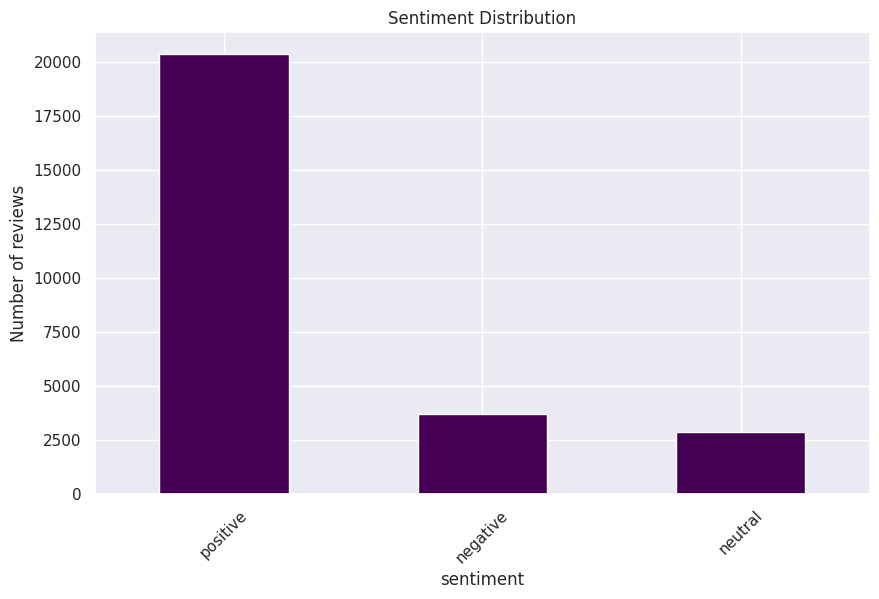

In [39]:
plot_bar_chart(sentiment_counts, 'sentiment', 'Number of reviews', 'Sentiment Distribution', stacked=False )

- **Positive Reviews** dominate, with significantly more reviews in this category (over 20,000). This suggests a strong leaning toward positivity in the dataset.

- **Negative Reviews** are far fewer, numbering around 3,000. This indicates fewer people expressed negative sentiments.

- **Neutral Reviews** are the least frequent, with around 2,500 reviews. This suggests a smaller portion of reviews are neither strongly positive nor negative.

This class imbalance could have implications for sentiment analysis, such as potential biases in a predictive model if the imbalance isn't addressed. Addressing these imbalances (e.g., via resampling, weighting, or other methods) will be considered before moving to modeling.

#### 2.1.2 Length Analysis

In [40]:
# check for the length of a review
data['reviews'][0]

"Five Stars  Amazon, please buy the show! I'm hooked!"

In [41]:
length_sample = len(data['reviews'][0])
print(f'Length of a sample review: {length_sample}')

Length of a sample review: 52


In [42]:
data['Length'] = data['reviews'].str.len()
data.head(3)

,rating,timestamp,movie_title,price,categories,reviews,sentiment,clean_review,reviews_tokenized,Length
0,5,2015-08-24 03:07:17,Sneaky Pete,14.570061,Suspense,"Five Stars Amazon, please buy the show! I'm h...",positive,five star amazon please buy show im hooked,"[Five, Stars, Amazon, ,, please, buy, the, sho...",52
1,5,2016-04-19 21:16:50,Creative Galaxy,14.570061,Kids,Five Stars My Kiddos LOVE this show!!,positive,five star kiddos love show,"[Five, Stars, My, Kiddos, LOVE, this, show, !, !]",38
2,4,2016-09-16 18:39:49,Seven Girlfriends,12.990000,Comedy,Four Stars It was pretty good. Had some prett...,positive,four star wa pretty good pretty comical scene ...,"[Four, Stars, It, was, pretty, good, ., Had, s...",95


In [43]:
# create a function for box plots
def box_plot(df, col):
    fig, ax = plt.subplots(figsize=(8,7))
    sns.boxplot(x="sentiment", y=col, data=df)
    plt.title(f"Boxplot of {col} by Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel(col)
    plt.xticks(rotation=45);


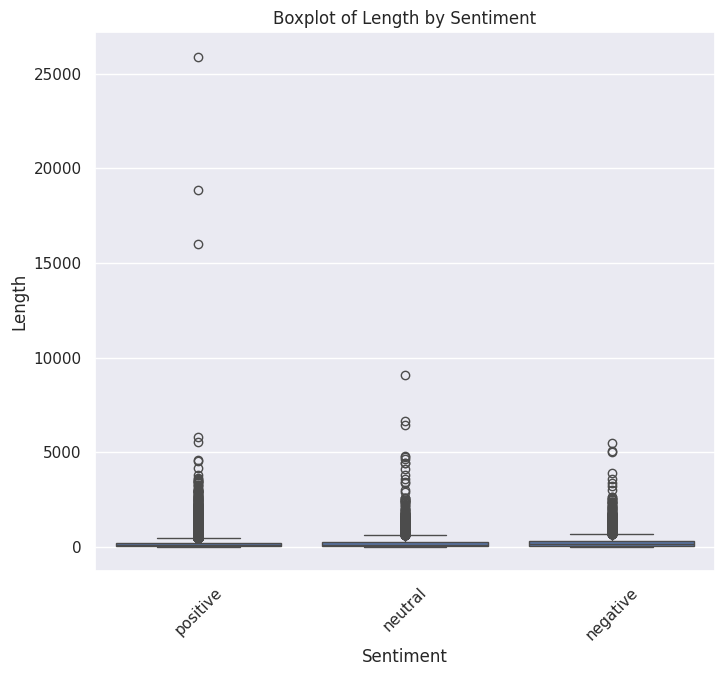

In [44]:
box_plot(data, 'Length')

**Positive Sentiment**
- Wider distribution with reviews ranging from concise to extremely detailed. This reflects that users with positive sentiments often express themselves in more elaborate ways, but there's also variability with shorter feedback included.
- The presence of outliers with higher word counts suggests that some users go into detail when praising the product or content.

**Neutral Sentiment**
 - Neutral reviews exhibit a slightly wider distribution compared to negative reviews, with word counts that fall between concise and moderately descriptive.
- The lack of extreme outliers and the middle-range distribution suggest that users providing neutral feedback often limit themselves to balanced and succinct descriptions.

**Negative Sentiment**
- Most concise reviews, with a narrow distribution and lower median word counts. This suggests that users expressing negative feedback tend to keep their reviews brief and to the point.
- The narrow range implies consistency in word count, as users often convey dissatisfaction in a few impactful words.

### Word Count
- This entails number of words in a review

Advantages of word counts include:

1. Identifying Review Quality
  - Short reviews (1-5 words) → Often vague ("Good", "Bad", "Works well")
  - Medium-length reviews (10-50 words) → More informative but still concise
  - Long reviews (50+ words) → Typically more detailed.

2. Enhancing Sentiment Analysis
  - Short reviews might have stronger polarity ("Terrible!" = negative, "Amazing!" = positive).
  - Longer reviews may contain mixed sentiment or more detail about the movie.

In [45]:
# word count
word_count = data['reviews'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 9


In [46]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [47]:
data['Word_count'] = data['reviews'].apply(word_count)
data.head()

,rating,timestamp,movie_title,price,categories,reviews,sentiment,clean_review,reviews_tokenized,Length,Word_count
0,5,2015-08-24 03:07:17.000,Sneaky Pete,14.570061,Suspense,"Five Stars Amazon, please buy the show! I'm h...",positive,five star amazon please buy show im hooked,"[Five, Stars, Amazon, ,, please, buy, the, sho...",52,9
1,5,2016-04-19 21:16:50.000,Creative Galaxy,14.570061,Kids,Five Stars My Kiddos LOVE this show!!,positive,five star kiddos love show,"[Five, Stars, My, Kiddos, LOVE, this, show, !, !]",38,7
2,4,2016-09-16 18:39:49.000,Seven Girlfriends,12.990000,Comedy,Four Stars It was pretty good. Had some prett...,positive,four star wa pretty good pretty comical scene ...,"[Four, Stars, It, was, pretty, good, ., Had, s...",95,16
3,3,2016-11-08 22:14:17.000,Still Mine,9.990000,Drama,Ok love story A bit slow and an unsatisfying ...,neutral,ok love story bit slow unsatisfying ending,"[Ok, love, story, A, bit, slow, and, an, unsat...",52,10
4,1,2022-08-22 20:06:25.847,How I Live Now,12.990000,International,TRASH A movie based solely on INCEST. Storyli...,negative,trash movie based solely incest storyline garb...,"[TRASH, A, movie, based, solely, on, INCEST, ....",89,15


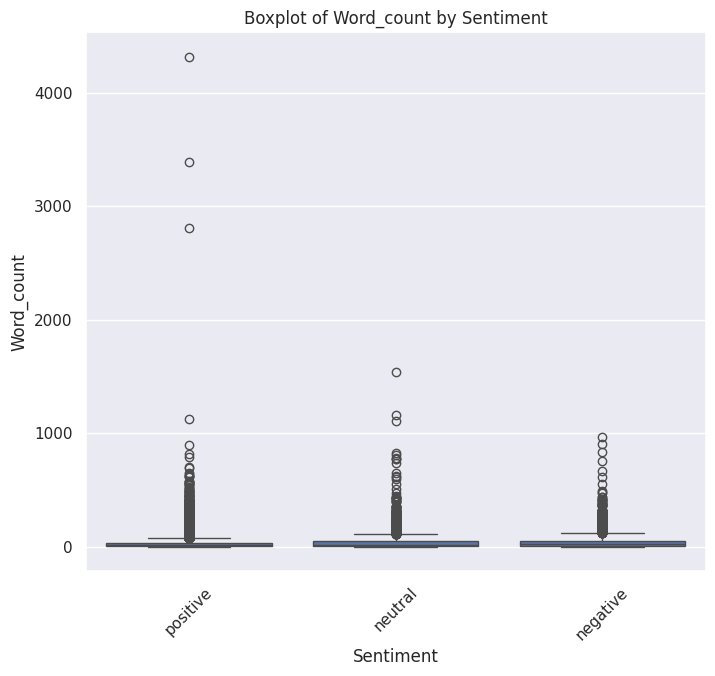

In [48]:
box_plot(data, 'Word_count')

### Mean word length
- This is the average length of words

In [49]:
data['mean_word_length'] = data['reviews'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head()

,rating,timestamp,movie_title,price,categories,reviews,sentiment,clean_review,reviews_tokenized,Length,Word_count,mean_word_length
0,5,2015-08-24 03:07:17.000,Sneaky Pete,14.570061,Suspense,"Five Stars Amazon, please buy the show! I'm h...",positive,five star amazon please buy show im hooked,"[Five, Stars, Amazon, ,, please, buy, the, sho...",52,9,4.777778
1,5,2016-04-19 21:16:50.000,Creative Galaxy,14.570061,Kids,Five Stars My Kiddos LOVE this show!!,positive,five star kiddos love show,"[Five, Stars, My, Kiddos, LOVE, this, show, !, !]",38,7,4.428571
2,4,2016-09-16 18:39:49.000,Seven Girlfriends,12.990000,Comedy,Four Stars It was pretty good. Had some prett...,positive,four star wa pretty good pretty comical scene ...,"[Four, Stars, It, was, pretty, good, ., Had, s...",95,16,4.937500
3,3,2016-11-08 22:14:17.000,Still Mine,9.990000,Drama,Ok love story A bit slow and an unsatisfying ...,neutral,ok love story bit slow unsatisfying ending,"[Ok, love, story, A, bit, slow, and, an, unsat...",52,10,4.200000
4,1,2022-08-22 20:06:25.847,How I Live Now,12.990000,International,TRASH A movie based solely on INCEST. Storyli...,negative,trash movie based solely incest storyline garb...,"[TRASH, A, movie, based, solely, on, INCEST, ....",89,15,4.933333


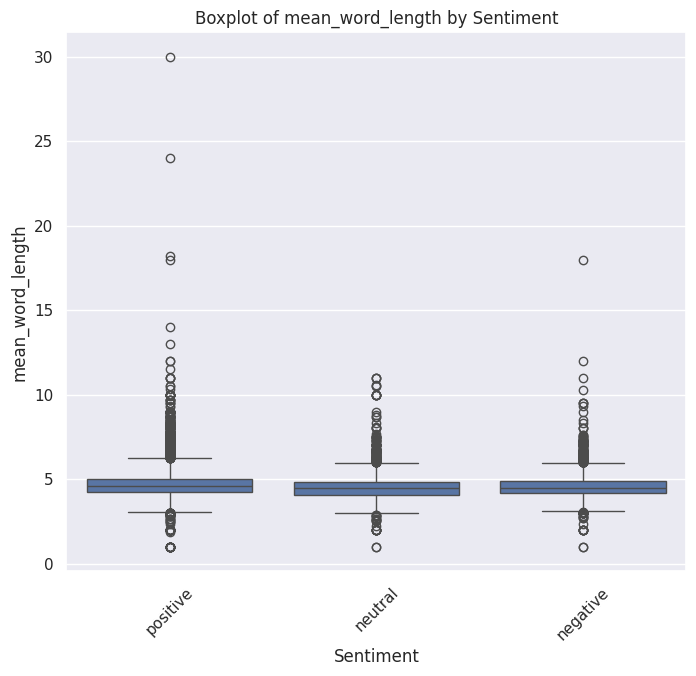

In [50]:
box_plot(data, 'mean_word_length')

#### 2.1.3 Trend Analysis

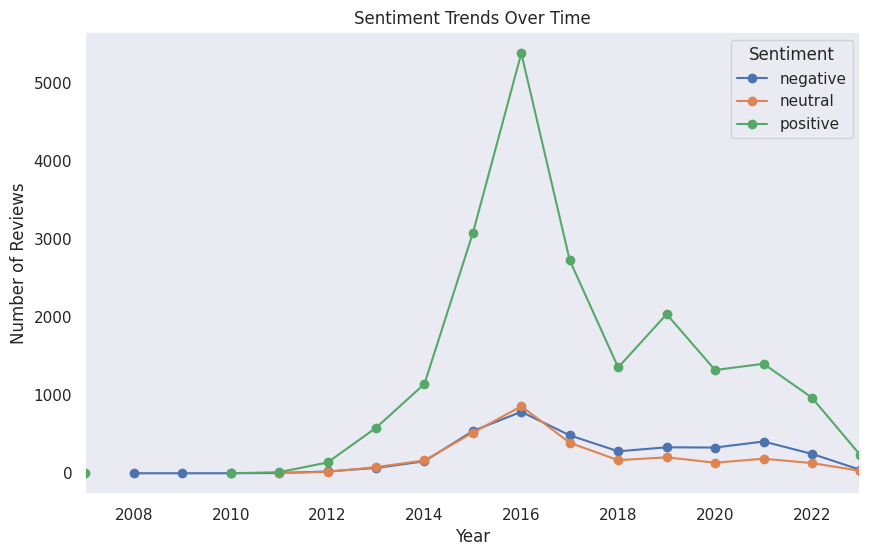

In [51]:
# Group by Year and sentiment
time_sentiment = data.groupby([data['timestamp'].dt.to_period('Y'), 'sentiment']).size().unstack()

# Plot sentiment trends over time
time_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid()
plt.show()


**Positive Sentiment (Green Line)**

- Dominates over the entire time period, peaking dramatically around 2016 with over 5,000 reviews. This surge could reflect an event, product, or content that received overwhelming positive attention during that year.
- After 2016, positive reviews show a decline, leveling off around 2,500–3,000 reviews by 2022.

**Negative Sentiment (Blue Line)**

- Remains relatively stable with low counts throughout the years, consistently staying below 1,500 reviews.
- A slight increase can be observed around 2016 and 2018, possibly corresponding to specific content or events that triggered more negative feedback.

**Neutral Sentiment (Orange Line)**

- Similar to negative sentiments, neutral reviews are consistently low, hovering around 1,000 or fewer reviews throughout the years.
- There is a small increase around 2016, though less pronounced than the spike in positive sentiments.

**Overall Patterns**
- The dramatic peak in positive sentiment around 2016 suggests a significant trend or popularity surge. Negative and neutral sentiments, while increasing slightly at the same time, remain far lower.
- After 2016, all sentiments gradually decline, though positive reviews still outnumber the others by a wide margin.

**Possible Next Steps**
- Investigate what happened around 2016 that drove the massive increase in positive reviews.
- Explore factors contributing to the relatively stable presence of negative and neutral sentiments compared to the fluctuating positive trend.



#### 2.1.4 Sentiment Bivariate Analysis

#### 2.1.4.1 Sentiment by Genres (Categories)

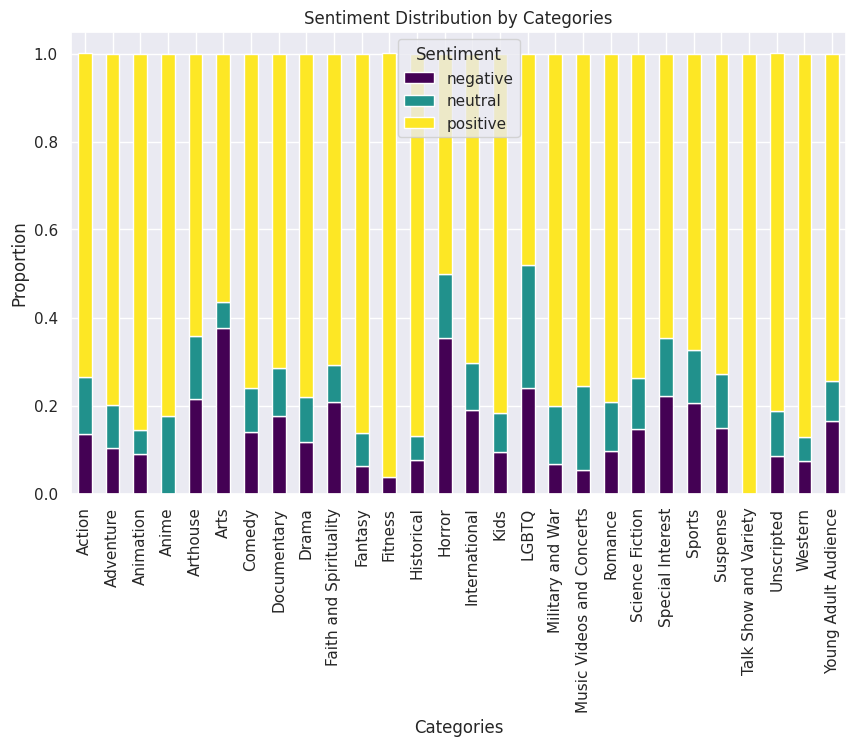

In [52]:
# Cross-tabulation for sentiment and categories
category_sentiment = pd.crosstab(data['categories'], data['sentiment'], normalize='index')

# Stacked bar chart
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Categories')
plt.xlabel('Categories')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()



**Positive Sentiment (Yellow)**

- Categories like Talkshow and Variety and fitness have the highest proportion of positive sentiments, indicating a generally favorable reception in these genres.
- Animation, Fantasy,Historical and Western and also show strong positive sentiment, likely reflecting their appeal to general audiences.

**Neutral Sentiment (Teal)**

- Categories like Documentary, Talk Show and Variety, and Fitness have notable proportions of neutral sentiments. This suggests these genres may elicit more informational or balanced reviews, rather than strong emotional reactions.
- The International and Faith and Spirituality categories also display significant neutral sentiments, likely due to diverse audience perspectives.

**Negative Sentiment (Purple)**

- Categories like Horror, Military and War, and Fitness stand out with higher proportions of negative sentiment. This may indicate dissatisfaction with certain content or unmet expectations.
- Romance and Drama also show moderate negative sentiment, possibly reflecting subjective tastes or polarizing themes.

**Key Insights**
- Audience Preferences: Categories like Animation, Kids, and Adventure are highly favored, while genres such as Horror and Military often elicit critical feedback.
- Balanced Reception: Categories with higher neutral sentiment, such as Documentary and Faith-based content, suggest these genres may attract more nuanced reactions.

Categories with higher negative sentiment could benefit from analyzing specific user feedback to address shortcomings.

#### 2.1.4.1 Sentiment by Price (Paid or Free)

In [53]:
# Create a binary column for paid/free
data['is_free'] = data['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

# Cross-tabulation for sentiment and price
price_sentiment = pd.crosstab(data['is_free'], data['sentiment'], normalize='index')

# # Stacked bar chart
# price_sentiment.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
# plt.title('Sentiment Distribution by Price (Paid vs Free)')
# plt.xlabel('Price Category')
# plt.ylabel('Proportion')
# plt.legend(title='Sentiment')
# plt.show()


<Figure size 1000x600 with 0 Axes>

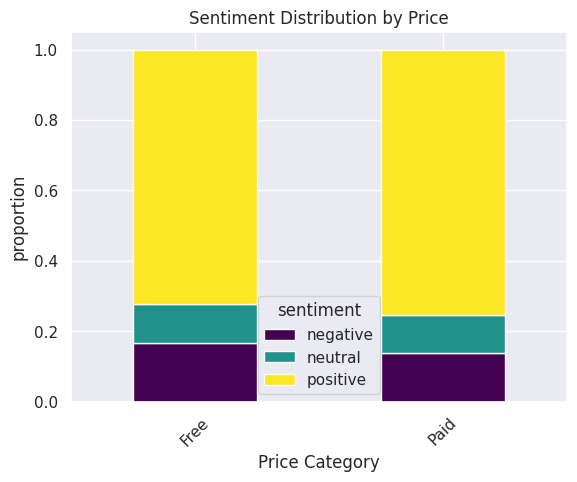

In [54]:
plot_bar_chart(price_sentiment, 'Price Category', 'proportion', 'Sentiment Distribution by Price', stacked=True)

- Both free and paid content have the highest proportion of positive sentiment, showing that users generally express more favorable opinions, regardless of whether the content was free or paid.

- Positive sentiment slightly dominates more in paid content, which could indicate users finding value in what they’ve paid for.

- Negative sentiment is the least common, but it appears slightly more in free content, possibly reflecting dissatisfaction with expectations when the content is free or of lower quality.

#### 2.1.5 Top 20 Common Words

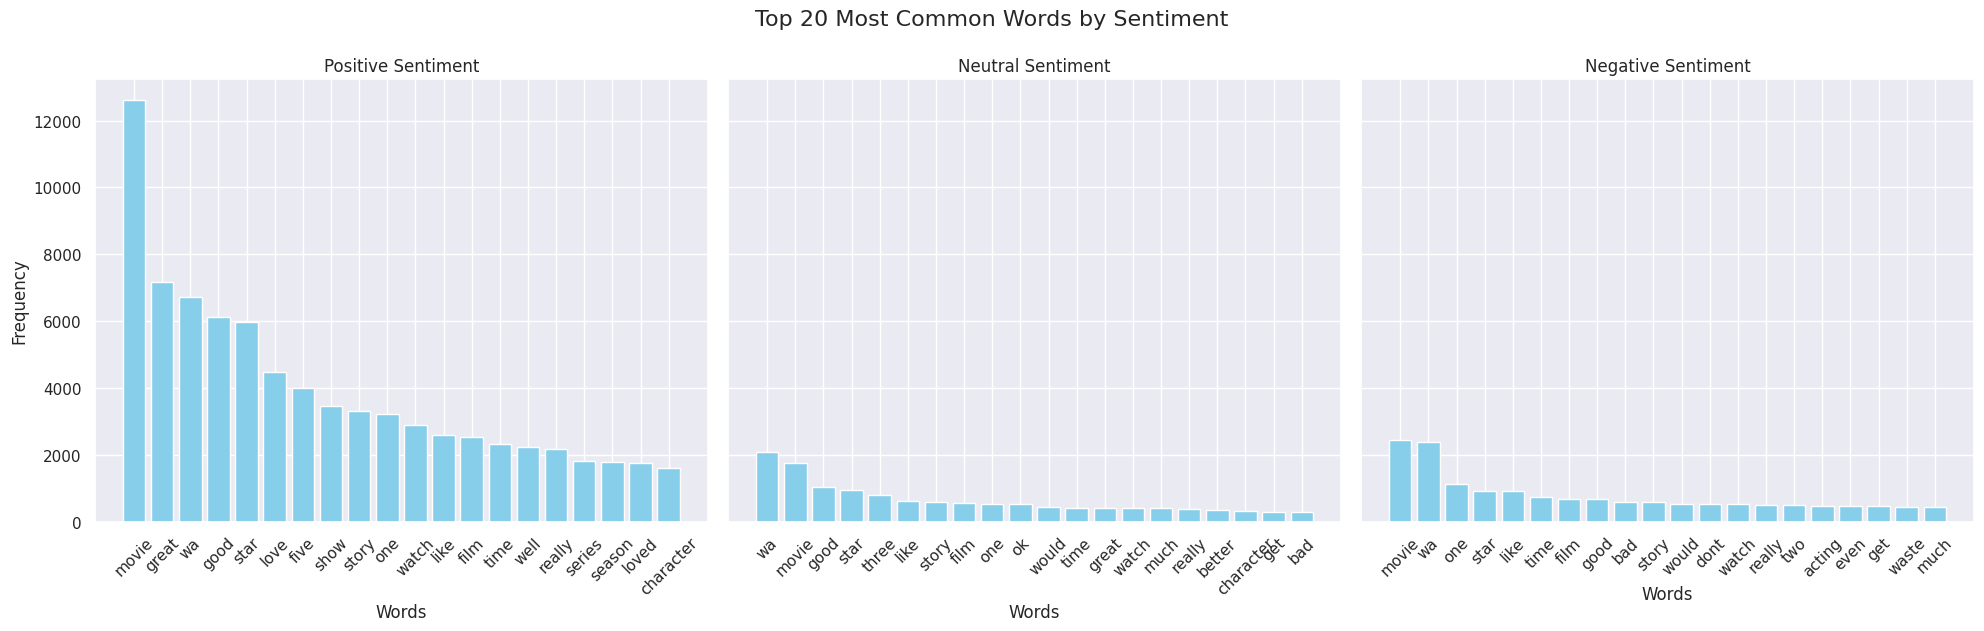

In [55]:
# Function to get top common words for a given sentiment
def get_top_words(sentiment):
    sentiment_reviews = ' '.join(data[data['sentiment'] == sentiment]['clean_review']).split()
    return Counter(sentiment_reviews).most_common(20)

# Get common words for each sentiment
positive_words = get_top_words('positive')
neutral_words = get_top_words('neutral')
negative_words = get_top_words('negative')

# Prepare data for plotting
positive_words, positive_counts = zip(*positive_words)
neutral_words, neutral_counts = zip(*neutral_words)
negative_words, negative_counts = zip(*negative_words)

# Create subplots for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for Positive Sentiment
axes[0].bar(positive_words, positive_counts, color='skyblue')
axes[0].set_title('Positive Sentiment')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Neutral Sentiment
axes[1].bar(neutral_words, neutral_counts, color='skyblue')
axes[1].set_title('Neutral Sentiment')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

# Plot for Negative Sentiment
axes[2].bar(negative_words, negative_counts, color='skyblue')
axes[2].set_title('Negative Sentiment')
axes[2].set_xlabel('Words')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Top 20 Most Common Words by Sentiment', fontsize=16, y=1.05)
plt.show()


**Positive Sentiment**

- Words like "movie," "great," "good," "love," "show," and "story" dominate.These words convey enthusiasm and strong approval, which aligns with a positive sentiment.
- Words such as "time," "really," "loved," and "well" suggest detailed appreciation or personal connections to the content.
- Words like "series" and "season" might indicate users favorably reviewing TV shows or multi-part content.

Positive sentiment reviews are often more specific, expressing satisfaction, emotional attachment, and appreciation for the quality of the movie or series.

**Neutral Sentiment**
- Words such as "movie," "good," "story," "film," "ok," "much," and "would" are prevalent.
- The word "ok" stands out, reflecting the nature of neutral feedback where users are neither overly impressed nor dissatisfied.
- Words like "better" and "character" indicate neutral feedback may involve constructive criticism, suggesting areas of improvement.
- "Great" appearing alongside "ok" suggests ambivalence in sentiment reviews, where both positive and mediocre tones exist.

Neutral sentiment reviews have mixed descriptions, often balancing praise with critique or indifference.

**Negative Sentiment**
- Words like "movie," "bad," "don't," "waste," "acting," "even," "time," and "get" dominate.
- Negative expressions such as "bad" and "waste" clearly express dissatisfaction.
- Words like "acting" and "even" suggest users criticize specific aspects like performance or the quality of content.
- The word "don't" appearing frequently implies negative reviews often contain direct discouragement or warnings.

Negative sentiment reviews are concise and direct, focusing on dissatisfaction or unmet expectations, with fewer descriptive words compared to positive reviews.

**Overall Insight**
- Words like "movie" and "time" are frequent across all sentiment classes, showing the consistency of these topics regardless of sentiment.
- Positive reviews tend to use descriptive and emotionally charged words, while neutral reviews balance opinion, and negative reviews are focused on direct criticism or dissatisfaction.



#### 2.1.6 Word Clouds

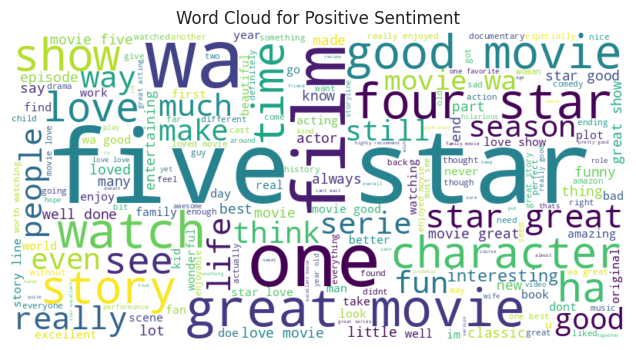

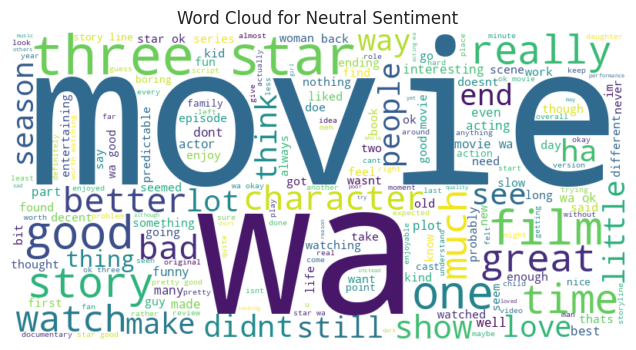

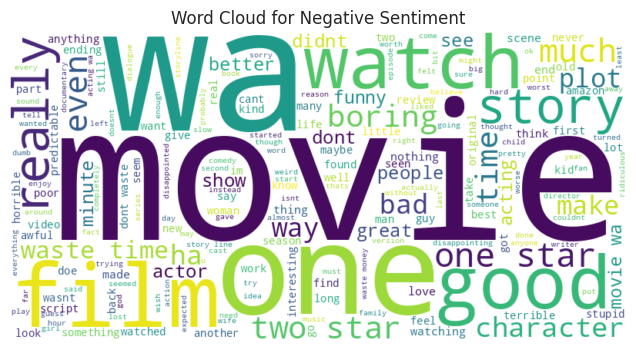

In [56]:
# Generate word clouds by sentiment
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['clean_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)

    # Plot word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()


- Positive sentiment reviews heavily focus on praising storytelling, character development, and overall emotional engagement. The frequent mention of "great," "love," "good," and "five-star" highlights the satisfaction and excitement users associate with their favorite content.
- Neutral sentiments seem to provide balanced evaluations, often describing technical or storyline aspects of movies or TV shows. The frequent mention of words tied to storytelling ("plot," "character," "story") shows that neutral reviewers are more focused on describing, rather than judging, the content.
- Negative sentiments words like "boring," "waste," "awful," and "bad" reflect a severe level of dissatisfaction and directly convey negative emotion.

### Get top N-grams

In [57]:
def get_top_ngrams(text, ngram_range=(2,2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    ngram_counts = vectorizer.fit_transform(text)
    ngram_sum = np.asarray(ngram_counts.sum(axis=0)).flatten()

    ngrams_freq = list(zip(vectorizer.get_feature_names_out(), ngram_sum))
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:n]

    return ngrams_freq

In [58]:
# Filter reviews by sentiment
positive_reviews = data[data["sentiment"] == "positive"]["clean_review"]
neutral_reviews = data[data["sentiment"] == "neutral"]["clean_review"]
negative_reviews = data[data["sentiment"] == "negative"]["clean_review"]

In [59]:
# Get top bigrams
top_positive_bigrams = get_top_ngrams(positive_reviews, ngram_range=(2, 2), n=10)
top_neutral_bigrams = get_top_ngrams(neutral_reviews, ngram_range=(2, 2), n=10)
top_negative_bigrams = get_top_ngrams(negative_reviews, ngram_range=(2, 2), n=10)

In [60]:
print("Top Positive Bigrams:", top_positive_bigrams)

Top Positive Bigrams: [('great movie', np.int64(1636)), ('good movie', np.int64(1359)), ('star great', np.int64(932)), ('movie wa', np.int64(676)), ('star good', np.int64(617)), ('love movie', np.int64(538)), ('movie great', np.int64(456)), ('wa good', np.int64(440)), ('star love', np.int64(438)), ('story line', np.int64(422))]


In [61]:
print("Top Neutral Bigrams:", top_neutral_bigrams)

Top Neutral Bigrams: [('movie wa', np.int64(162)), ('wa ok', np.int64(152)), ('good movie', np.int64(131)), ('wa good', np.int64(101)), ('star ok', np.int64(96)), ('story line', np.int64(86)), ('star good', np.int64(83)), ('star wa', np.int64(79)), ('pretty good', np.int64(76)), ('wa okay', np.int64(67))]


In [62]:
print("Top Negative Bigrams:", top_negative_bigrams)

Top Negative Bigrams: [('waste time', np.int64(267)), ('movie wa', np.int64(215)), ('dont waste', np.int64(113)), ('story line', np.int64(91)), ('waste money', np.int64(78)), ('acting wa', np.int64(70)), ('wa good', np.int64(63)), ('didnt like', np.int64(60)), ('dont know', np.int64(60)), ('good movie', np.int64(57))]


In [63]:
# positive Bigrams dataframe
positive_bigram_df = pd.DataFrame(top_positive_bigrams, columns=["Bigram", "Frequency"])

# neutral bigrams df
neutral_bigram_df = pd.DataFrame(top_neutral_bigrams, columns=["Bigram", "Frequency"])

# negative bigrams df
negative_bigram_df = pd.DataFrame(top_negative_bigrams, columns=["Bigram", "Frequency"])

In [64]:
def plot_ngram_frequency(ngram_df, x_col="Frequency", y_col="Bigram", title="Top N-grams in Reviews", palette="Blues_r"):
    """
    Plots a bar chart of the most frequent n-grams.

    Parameters:
        ngram_df (DataFrame): A DataFrame containing n-grams and their frequencies.
        x_col (str, optional): The column name for frequency (default: "Frequency").
        y_col (str, optional): The column name for n-grams (default: "Bigram").
        title (str, optional): Title of the plot (default: "Top N-grams in Reviews").
        palette (str, optional): Color palette for the bar chart (default: "Blues_r").
    """
    plt.figure(figsize=(10, 5))
    sns.barplot(y=y_col, x=x_col, data=ngram_df, palette=palette)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col);

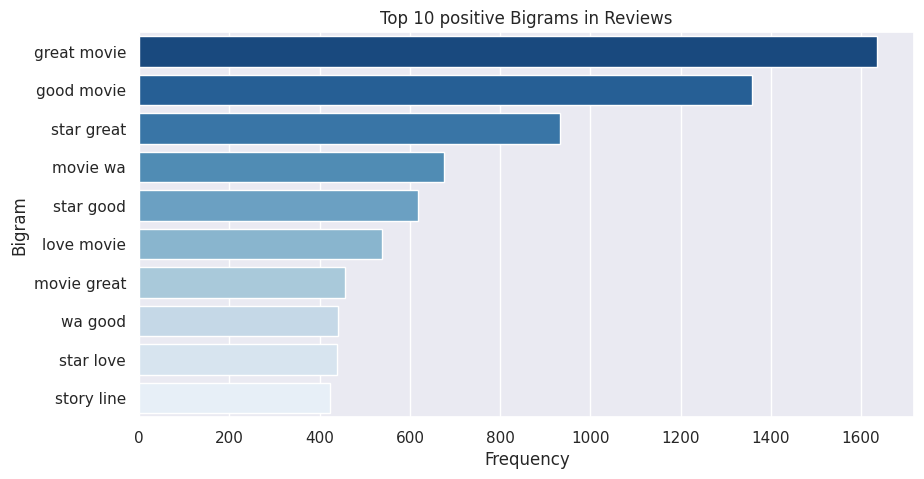

In [65]:
plot_ngram_frequency(positive_bigram_df, title="Top 10 positive Bigrams in Reviews")

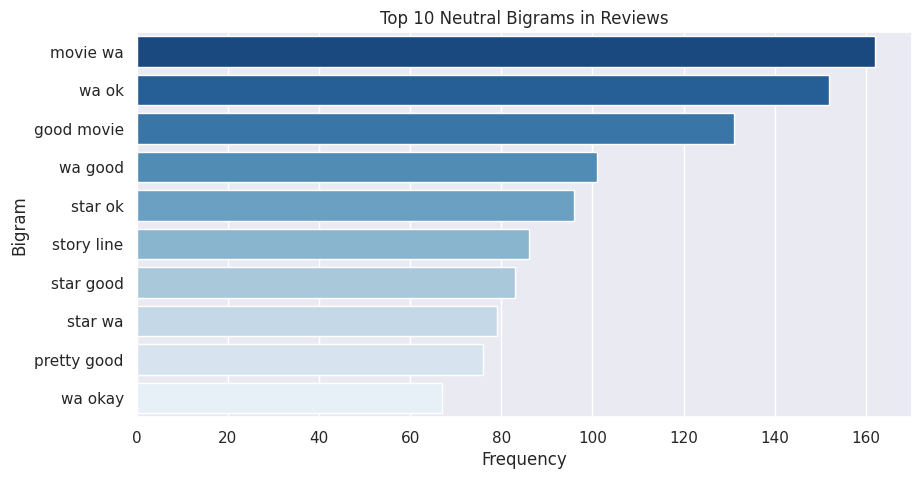

In [66]:
plot_ngram_frequency(neutral_bigram_df, title="Top 10 Neutral Bigrams in Reviews")

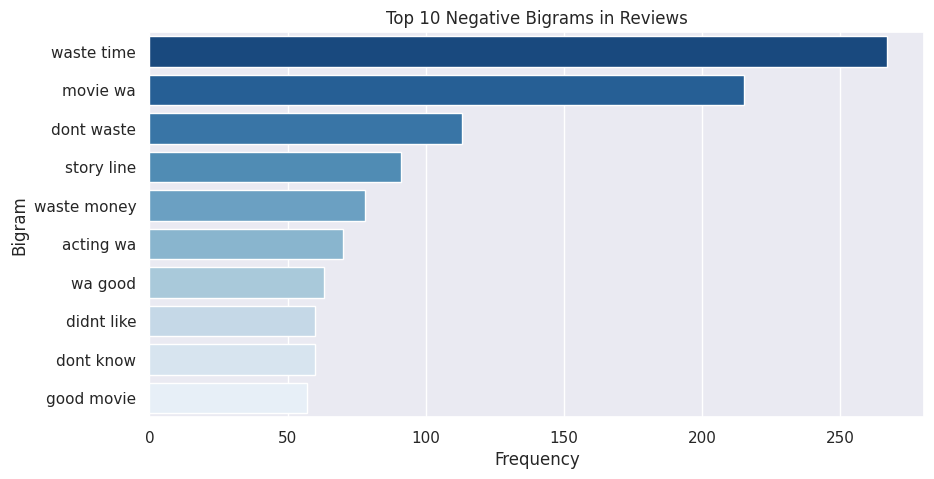

In [67]:
plot_ngram_frequency(negative_bigram_df, title="Top 10 Negative Bigrams in Reviews")

In [68]:
# Get top trigrams
top_positive_trigrams = get_top_ngrams(positive_reviews, ngram_range=(3, 3), n=10)
top_neutral_trigrams = get_top_ngrams(neutral_reviews, ngram_range=(3, 3), n=10)
top_negative_trigrams = get_top_ngrams(negative_reviews, ngram_range=(3, 3), n=10)

In [69]:
# Positive Trigrams DataFrame
positive_trigram_df = pd.DataFrame(top_positive_trigrams, columns=["Trigram", "Frequency"])

# Neutral Trigrams DataFrame
neutral_trigram_df = pd.DataFrame(top_neutral_trigrams, columns=["Trigram", "Frequency"])

# Negative Trigrams DataFrame
negative_trigram_df = pd.DataFrame(top_negative_trigrams, columns=["Trigram", "Frequency"])

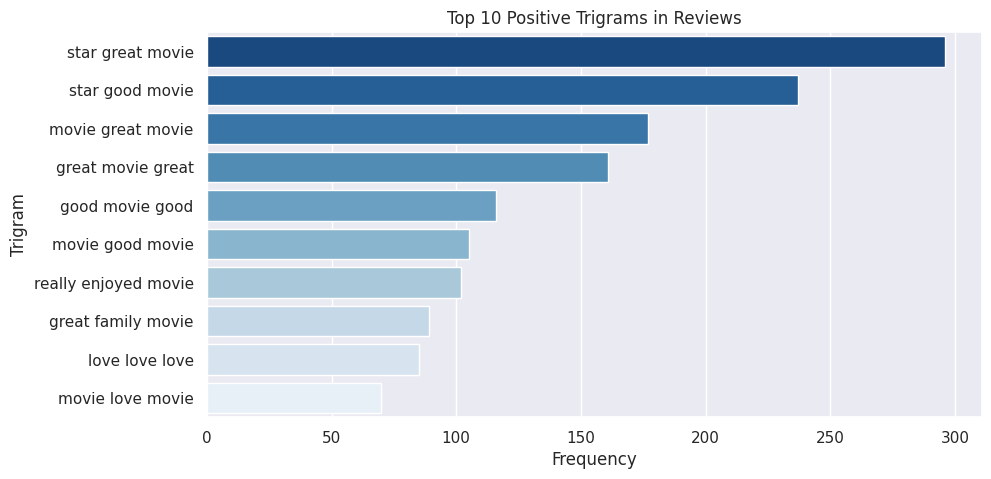

In [70]:
plot_ngram_frequency(positive_trigram_df, y_col="Trigram", title="Top 10 Positive Trigrams in Reviews")

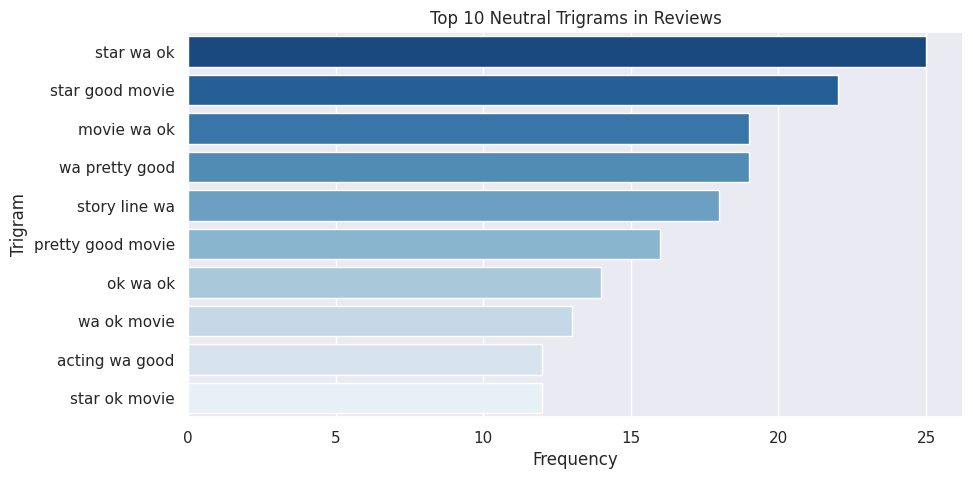

In [71]:
plot_ngram_frequency(neutral_trigram_df, y_col="Trigram", title="Top 10 Neutral Trigrams in Reviews")

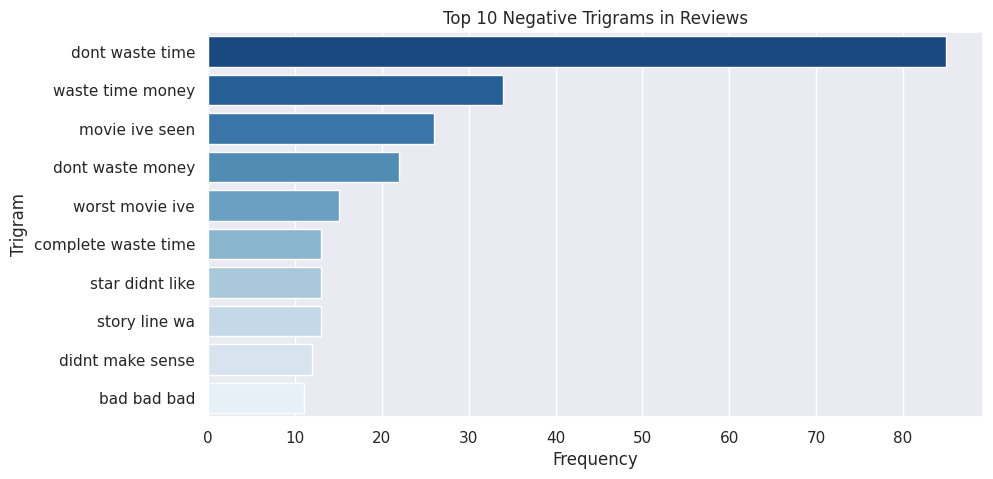

In [72]:
plot_ngram_frequency(negative_trigram_df, y_col="Trigram", title="Top 10 Negative Trigrams in Reviews")

### Perform POS Tagging
- We'll extract the `most common nouns`, `adjectives`, and `verbs` to analyze the language used in reviews.

In [73]:
# Load the English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

In [74]:
def pos_tagging(text):
    doc = nlp(text)
    pos_counts = Counter(token.pos_ for token in doc)
    return pos_counts

In [75]:
# Apply POS tagging to all reviews
data["pos_counts"] = data["reviews"].apply(pos_tagging)

In [76]:
# Aggregate POS frequencies
pos_totals = Counter()
for pos_dict in data["pos_counts"]:
    pos_totals.update(pos_dict)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_totals.items(), columns=["POS", "Count"])
pos_df = pos_df.sort_values(by="Count", ascending=False)

In [77]:
pos_df.head(3)

,POS,Count
7,NOUN,179703
3,PUNCT,132100
5,VERB,115708


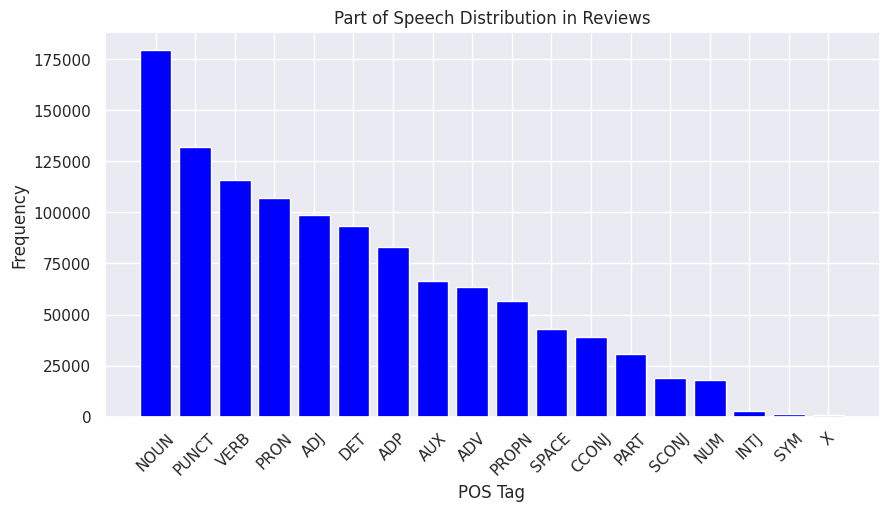

In [78]:
# Plot POS distribution
plt.figure(figsize=(10, 5))
plt.bar(pos_df["POS"], pos_df["Count"], color="blue")
plt.title("Part of Speech Distribution in Reviews")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show();

### Extract Most Common Nouns & Adjectives

In [79]:
def extract_words(text, pos_type):
    doc = nlp(text)
    words = [token.text.lower() for token in doc if token.pos_ == pos_type and not token.is_stop]
    return words

In [107]:
# Function to extract POS words for a specific sentiment
def get_pos_by_sentiment(data, sentiment_label, pos_type):
    filtered_texts = data[data["sentiment"] == sentiment_label]["reviews"]
    words = []
    filtered_texts.apply(lambda x: words.extend(extract_words(x, pos_type)))
    return Counter(words).most_common(20)  # Return top 20 most common words

In [108]:
common_verbs_positive = get_pos_by_sentiment(data, "positive", "VERB")

In [109]:
common_verbs_positive

[('love', 3002),
 ('watch', 2531),
 ('loved', 1746),
 ('enjoyed', 1453),
 ('watching', 1335),
 ('like', 1104),
 ('watched', 952),
 ('think', 812),
 ('seen', 706),
 ('know', 701),
 ('liked', 700),
 ('enjoy', 610),
 ('recommend', 530),
 ('thought', 514),
 ('want', 501),
 ('going', 462),
 ('makes', 429),
 ('feel', 402),
 ('find', 401),
 ('got', 395)]

In [110]:
common_verbs_neutral = get_pos_by_sentiment(data, "neutral", "VERB")

In [111]:
common_verbs_neutral

[('watch', 343),
 ('watching', 236),
 ('like', 226),
 ('think', 205),
 ('know', 155),
 ('seen', 130),
 ('watched', 125),
 ('thought', 122),
 ('liked', 122),
 ('found', 120),
 ('love', 120),
 ('going', 117),
 ('enjoy', 110),
 ('want', 104),
 ('got', 99),
 ('expected', 94),
 ('find', 93),
 ('said', 91),
 ('looking', 81),
 ('enjoyed', 80)]

In [112]:
common_verbs_negative = get_pos_by_sentiment(data, "negative", "VERB")

In [113]:
common_verbs_negative

[('watch', 501),
 ('watching', 358),
 ('like', 331),
 ('know', 241),
 ('think', 194),
 ('watched', 181),
 ('waste', 178),
 ('seen', 177),
 ('going', 169),
 ('want', 160),
 ('acting', 143),
 ('found', 131),
 ('love', 129),
 ('got', 129),
 ('thought', 129),
 ('wanted', 106),
 ('believe', 105),
 ('trying', 105),
 ('find', 105),
 ('enjoy', 101)]

In [114]:
common_adjectives_positive = get_pos_by_sentiment(data, "positive", "ADJ")

In [115]:
common_adjectives_positive

[('great', 6469),
 ('good', 5793),
 ('best', 1195),
 ('funny', 1166),
 ('interesting', 972),
 ('worth', 945),
 ('excellent', 885),
 ('little', 831),
 ('old', 791),
 ('better', 719),
 ('wonderful', 665),
 ('real', 618),
 ('amazing', 613),
 ('favorite', 577),
 ('entertaining', 571),
 ('bad', 544),
 ('new', 507),
 ('true', 507),
 ('nice', 499),
 ('beautiful', 464)]

In [116]:
common_adjectives_neutral = get_pos_by_sentiment(data, "neutral", "ADJ")

In [117]:
common_adjectives_neutral

[('good', 1009),
 ('great', 380),
 ('bad', 280),
 ('ok', 279),
 ('better', 270),
 ('little', 251),
 ('interesting', 227),
 ('funny', 176),
 ('worth', 165),
 ('slow', 156),
 ('best', 144),
 ('okay', 137),
 ('old', 125),
 ('predictable', 115),
 ('nice', 95),
 ('new', 93),
 ('decent', 93),
 ('hard', 93),
 ('entertaining', 90),
 ('different', 87)]

In [118]:
common_adjectives_negative = get_pos_by_sentiment(data, "negative", "ADJ")

In [120]:
common_adjectives_negative

[('good', 672),
 ('bad', 579),
 ('boring', 268),
 ('great', 264),
 ('terrible', 240),
 ('better', 239),
 ('funny', 217),
 ('worth', 188),
 ('poor', 183),
 ('old', 173),
 ('horrible', 167),
 ('little', 162),
 ('awful', 154),
 ('stupid', 152),
 ('worst', 147),
 ('real', 144),
 ('slow', 143),
 ('interesting', 143),
 ('best', 113),
 ('original', 108)]

In [95]:
# def generate_wordcloud(words, title="Word Cloud", width=800, height=400, background_color="white"):
#     """
#     Generates and displays a word cloud from a list of words (nouns, adjectives, etc.).

#     Parameters:
#         words (list): A list of extracted words (e.g., nouns or adjectives).
#         title (str, optional): Title of the plot (default: "Word Cloud").
#         width (int, optional): Width of the word cloud.
#         height (int, optional): Height of the word cloud.
#         background_color (str, optional): Background color.
#     """
#     # Join words into a single string
#     text = " ".join(words)

#     # Generate word cloud
#     wordcloud = WordCloud(width=width, height=height, background_color=background_color).generate(text)

#     # Plot the word cloud
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.imshow(wordcloud, interpolation="bilinear")
#     ax.axis("off")
#     plt.title(title);

In [96]:
# generate_wordcloud(nouns, title="Most Common Nouns in Reviews")

In [97]:
# generate_wordcloud(adjectives, title="Most Common Adjectives in Reviews")

In [98]:
# generate_wordcloud(adjectives, title="Most Common Verbs in Reviews")

### 3.0 Modeling

In this section:

1. We will split the split the dataset into train, validation and test sets.
2. Train 3 baseline models and evaluate the results using classification report and confusion matrix.
3. Hyperparameter tune the best baseline model and evaluate the results
3. Use advanced modeling techniques like LSTM and BERT Transformations to further improve the modelperformance

### 3.1 Split the dataset into train, validation and test sets
The trainng set will be used to fit the model and learn patterns from the data; we will use the **validation set** to tune hyperparameters (learning rate, number of layers etc) and evaluate the model during training. The validation set allows the comparison of different models and configurations to choose the best performing, without leaking information to the test set. We will use the **test set** to provide an unbiased evaluation of the final model's performance, mimicking how it would perform on real-world data.
- We will stratify the dataset to ensure classdistribution in each split remains similar to the orignal dataset.
- Test Size is set at 20%
- Validation set is set at 25% of the remaining 80% ,resulting in a finalsplit of 60% training,20% validation and 20% test.
- Random state ensures reprodicibility so that we can get the same splits each time.

In [99]:
# Define feature and target columns
X = data['clean_review']  # Features
y = data['sentiment']  # Target

# Split the dataset into training + validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Further split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# Print sizes of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 16190
Validation set size: 5397
Test set size: 5397


### 3.2 Baseline Models
In this section, we will train and evaluate a Multinomial Naive Bayes (NB), Support Vector Machine (SVM), and Random Forest (RF) using the TF-IDF Vectorizer.

The TF-IDF Vectorizer's parameters 'max_features' (to limit the number of features used in the dataset) and 'ngram_range' (to includes unigrams and bigrams for better context understanding) will be adjusted.

We will evaluate the best baseline model and further tune the hyperparameters to improve on the performance.

NB Classification Report:
               precision  recall  f1-score  support
negative           0.83    0.60      0.70   743.00
neutral            0.90    0.27      0.41   579.00
positive           0.86    0.99      0.92  4075.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.86    0.62      0.68  5397.00
weighted avg       0.86    0.86      0.84  5397.00


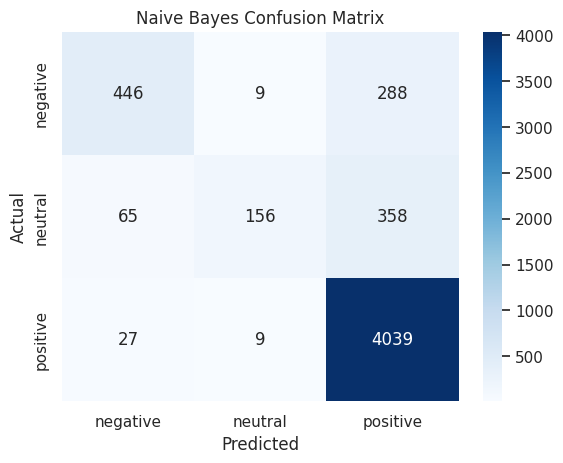

In [100]:
# Naive Bayes Pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,2))),
    ('nb', MultinomialNB())  # MultinomialNB inherently handles class imbalance with probabilities
])

# Fit the pipeline on training data
nb_pipeline.fit(X_train, y_train)

# Predict on validation data
y_val_pred_nb = nb_pipeline.predict(X_val)

# Classification report and confusion matrix for NB
nb_dict = classification_report(y_val, y_val_pred_nb, output_dict=True)
nb_df = pd.DataFrame(nb_dict).transpose()
print("NB Classification Report:\n",round(nb_df,2))

nb_cm = confusion_matrix(y_val, y_val_pred_nb)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_pipeline.classes_, yticklabels=nb_pipeline.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion Matrix Baseline NB")
plt.show()

**Positive Class**

- The model performed exceptionally well for the positive class, predicting 4042 out of 4085 samples correctly.
- However, this high accuracy may be due to the imbalance in the dataset, where the positive class overwhelms the others.

**Negative Class**
- Only 279 out of 745 negative samples are misclassified as positive and a smaller amount - 12 as neutral.

**Neutral Class**
- many instances are also misclassified as positive (351), suggesting the model is biased toward predicting the majority class.

**Class Imbalance Impact**

The classifier shows a strong bias for the positive class, likely due to its dominance in the training data. The minority classes (negative and neutral) suffer from high misclassification rates as a result.

**Next Steps**
Implement SVM and Random Forest models that allow weighting of classes

### 3.2.2 Baseline SVM Model
class_weight = 'balanced' assigns weights to classes inversely proportional to their frequency,compensating for imbalance

SVM Classification Report:
               precision  recall  f1-score  support
negative           0.75    0.74      0.74   743.00
neutral            0.63    0.52      0.57   579.00
positive           0.93    0.95      0.94  4075.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.77    0.74      0.75  5397.00
weighted avg       0.87    0.87      0.87  5397.00


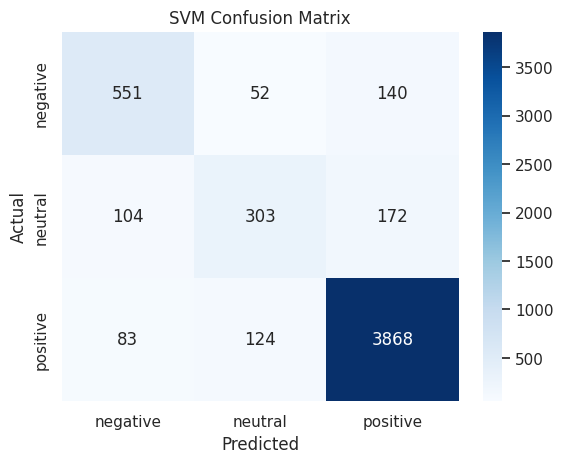

In [101]:
# Support Vector Machine Pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,2))),
    ('svm', SVC(class_weight='balanced', random_state=42)) # 'class_weight=balanced' to handle imbalance
])

# Fit the svm pipeline
svm_pipeline.fit(X_train, y_train)

# Predict on validation data
y_val_pred_svm = svm_pipeline.predict(X_val)

# Classification report and confusion matrix for SVM
svm_dict = classification_report(y_val, y_val_pred_svm, output_dict=True)
svm_df = pd.DataFrame(svm_dict).transpose()
print("SVM Classification Report:\n",round(svm_df,2))


svm_cm = confusion_matrix(y_val, y_val_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_pipeline.classes_, yticklabels=svm_pipeline.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion Matrix Baseline SVM")
plt.show()


**Strong Positive Class Performance**
- The model correctly predicted 3873 out of the total positive samples, demonstrating strong performance for the positive sentiment class.
- However, some positive samples were misclassified as neutral (123) or negative (89).

**Moderate Performance for the Negative Class**
- 561 out of the negative class samples were predicted correctly.
- There were 117 cases misclassified as positive, which might be concerning, as these errors could significantly affect interpretation as we are looking to correctly identify negative reviews.
- A smaller portion (67 samples) was misclassified as neutral.

**Challenges with the Neutral Class**
- This class saw significant confusion, with only 294 samples correctly classified.
- A large number of neutral samples were misclassified as positive (198) or negative (88). This is a common issue in sentiment analysis, as neutral classes often overlap with positive and negative sentiments in text.

**Recommendation for improvement**
- Undersamplethe majority class to balance the dataset
- Hyperparameter tuning - e.g.kernel type('linear', 'rbf'), regularization parameters (C) or (gamma) for better boundary definitions
- Try an enemble model like Random Forest

### 3.2.3 Random Forest Baseline Model
class_weight='balanced': Ensures that the minority class is not ignored during tree-building by giving it more weight in the loss calculation.

RF Classification Report:
               precision  recall  f1-score  support
negative           0.83    0.58      0.69   743.00
neutral            0.82    0.32      0.47   579.00
positive           0.86    0.99      0.92  4075.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.84    0.63      0.69  5397.00
weighted avg       0.86    0.86      0.84  5397.00


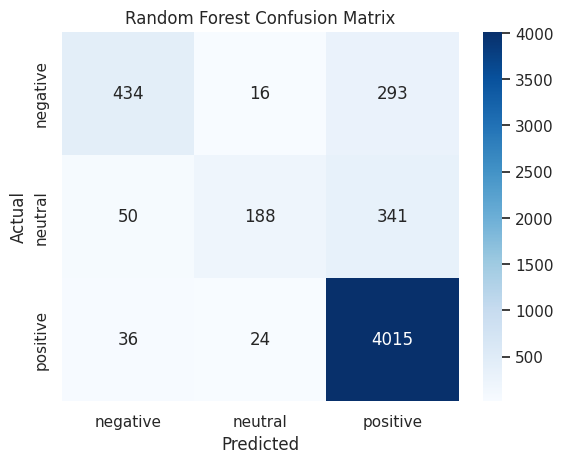

In [102]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,2))),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # 'class_weight=balanced' for imbalance
])


# Fit the rf pipeline
rf_pipeline.fit(X_train, y_train)

# Predict on validation data
y_val_pred_rf = rf_pipeline.predict(X_val)

# Classification report and confusion matrix for RF
rf_dict = classification_report(y_val, y_val_pred_rf, output_dict=True)
rf_df = pd.DataFrame(rf_dict).transpose()
print("RF Classification Report:\n",round(rf_df,2))

rf_cm = confusion_matrix(y_val, y_val_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_pipeline.classes_, yticklabels=rf_pipeline.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion Matrix Baseline RF")
plt.show()


**Positive Class**
- The model performs exceptionally well for the positive class, predicting 4037 out of 4085 positive instances correctly.
- 30 positive samples were misclassified as negative, and 18 as neutral, though these misclassifications are relatively low.

**Negative Class**

- 294 samples were misclassified as positive, which may stem from the class imbalance and overlapping features between negative and positive sentiments. 17 samples were incorrectly classified as neutral.

**Neutral Class**

- The most significant issue is the 339 neutral instances misclassified as positive, reflecting a potential bias toward predicting the dominant positive class. 38 neutral instances were incorrectly classified as negative.

A clear bias is evident in favor of the positive class due to its dominance in the dataset, leading to frequent misclassification of minority classes.



### 3.2.4 Comparing the results of the 3 baseline models and way forward

In [103]:

# Add a column to each DataFrame identifying the model
nb_df['Model'] = 'Naive Bayes'
svm_df['Model'] = 'SVM'
rf_df['Model'] = 'Random Forest'

# Combine the DataFrames
combined_report = pd.concat([nb_df, svm_df, rf_df], axis=0)

# Reset the index for a cleaner look
# Add a column to each DataFrame identifying the model
nb_df['Model'] = 'Naive Bayes'
svm_df['Model'] = 'SVM'
rf_df['Model'] = 'Random Forest'

# Combine the DataFrames
combined_report = pd.concat([nb_df, svm_df, rf_df], axis=0)

# Reset the index for a cleaner look
combined_report.reset_index(inplace=True)

# Pivot the combined report for a side-by-side comparison
pivot_report = combined_report.pivot(index='index', columns='Model', values=['precision', 'recall', 'f1-score'])

# Display the pivoted DataFrame
pivot_report = pivot_report.round(3)
pivot_report



precision                           recall                \
Model        Naive Bayes Random Forest    SVM Naive Bayes Random Forest   
index                                                                     
accuracy           0.860         0.859  0.875       0.860         0.859   
macro avg          0.863         0.841  0.768       0.620         0.631   
negative           0.829         0.835  0.747       0.600         0.584   
neutral            0.897         0.825  0.633       0.269         0.325   
positive           0.862         0.864  0.925       0.991         0.985   
weighted avg       0.861         0.855  0.869       0.860         0.859   

                       f1-score                       
Model           SVM Naive Bayes Random Forest    SVM  
index                                                 
accuracy      0.875       0.860         0.859  0.875  
macro avg     0.738       0.678         0.691  0.751  
negative      0.742       0.696         0.687  0.744  
neutral       0.523       0.414         0.466  0.573  
positive      0.949       0.922         0.920  0.937  
weighted avg  0.875       0.837         0.840  0.871

**Accuracy**
Naive Bayes: 86.27%; Random Forest: 86.40%; SVM: 87.39% (highest accuracy)

**SVM achieves the highest overall accuracy, making it the best model for correctly predicting sentiments across the dataset. However, accuracy alone can be misleading due to the dataset's imbalance, so other metrics need to be considered.**


**Negative Sentiment**
Precision: Naive Bayes: 0.83 ; Random Forest: 0.87 (highest) ; SVM: 0.76

Recall: Naive Bayes: 0.61; Random Forest: 0.58 (lowest); SVM: 0.76

F1-Score: Naive Bayes: 0.70; Random Forest: 0.696; SVM: 0.75

SVM performs the best in terms of F1-score for negative sentiment, balancing both precision and recall. However, Random Forest achieves the highest precision, which may reduce false positives for the negative class.

**Neutral Sentiment**
Precision: Naive Bayes: 0.88; Random Forest: 0.85; SVM: 0.60

Recall:Naive Bayes: 0.29; Random Forest: 0.35; SVM: 0.55

F1-Score: Naive Bayes: 0.44; Random Forest: 0.496; SVM: 0.506

**Neutral sentiment is a challenging class for all models, but SVM performs slightly better in terms of recall and F1-score, correctly identifying more neutral instances. Naive Bayes has high precision but struggles significantly with recall, likely due to misclassification as other sentiments.**

**Positive Sentiment**
Precision: Naive Bayes: 0.87; Random Forest: 0.86; SVM: 0.92

Recall: Naive Bayes: 0.99; Random Forest: 0.99; SVM: 0.94

F1-Score: Naive Bayes: 0.92; Random Forest: 0.92; SVM: 0.94

**All three models perform well for the positive class, with SVM achieving the highest precision and competitive recall and F1-score. Naive Bayes and Random Forest are slightly behind but still robust for this majority class.**

**Weighted Average**
Precision: Naive Bayes: 0.86; Random Forest: 0.86;SVM: 0.87

Recall:Naive Bayes: 0.86; Random Forest: 0.86; SVM: 0.87

F1-Score: Naive Bayes: 0.84; Random Forest: 0.85; SVM: 0.87

**SVM outperforms the others in weighted averages across all metrics. This indicates that SVM’s performance is skewed toward the majority class (positive), but it still handles the dataset better overall than the other two models.**

**Conclusion**
Best Model Overall: SVM achieves the highest accuracy, weighted averages, and strong positive sentiment performance. However, its macro-averaged recall and F1-score show it still struggles with minority classes.

Neutral Sentiment Weakness: All models need improvement in handling neutral sentiment, with SVM showing the most promise due to higher recall.

**Next Steps**
Tune the SVM Model to try and improve performance especially the recall on the Neutral and Negative Classes

### 3.3 Hyperparameter Tuned SVM Model

Using GridSearchCV, exprole a variety of parameter combinations tooptimize class separation and address the bias towards the positive class

In [104]:


# Define param grid
param_grid = {
    #'svm__C': [0.1, 1, 10, 100], # Regularization strength
    'svm__C': [10],
    #'svm__kernel': ['linear', 'rbf'],         # Types of kernels
    'svm__kernel': ['rbf'],
    #'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for non-linear kernels
    'svm__gamma': [0.01],
    #'svm__class_weight': ['balanced', None],  # Handling class imbalance
    'svm__class_weight': ['balanced']
}

# Define the GridSearchCV
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid=param_grid,
    scoring='recall_macro',  # Focus on improving macro-averaged recall
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1                # Use all CPU cores for parallel processing
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Macro Recall:", grid_search.best_score_)



Best Parameters: {'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Macro Recall: 0.7646994079206958


Fine-Tuned SVM Classification Report:

              precision    recall  f1-score   support

    negative       0.63      0.81      0.71       743
     neutral       0.43      0.67      0.52       579
    positive       0.97      0.84      0.90      4075

    accuracy                           0.82      5397
   macro avg       0.68      0.77      0.71      5397
weighted avg       0.86      0.82      0.83      5397



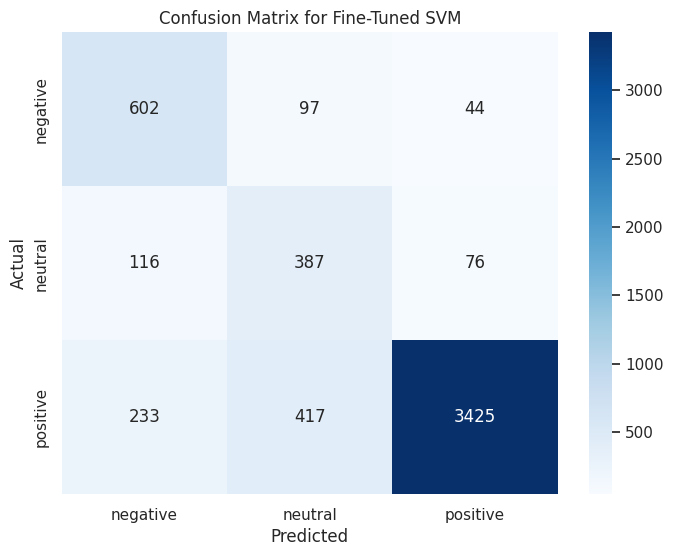

In [105]:
# Use the best model from GridSearchCV
best_svm_pipeline = grid_search.best_estimator_

# Predict on the validation set
y_val_pred_svm = best_svm_pipeline.predict(X_val)

# Generate the classification report
print("Fine-Tuned SVM Classification Report:\n")
print(classification_report(y_val, y_val_pred_svm))

# Generate the confusion matrix
svm_cm = confusion_matrix(y_val, y_val_pred_svm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_pipeline.classes_, yticklabels=best_svm_pipeline.classes_)
plt.title("Confusion Matrix for Fine-Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion Matrix Tuned SVM")
plt.show()


**Negative Class**

- Precision (0.66): When predicting negative sentiment, 66% of the predictions are correct. This is moderate and suggests some misclassifications into other classes.

- Recall (0.80): The model successfully identifies 80% of actual negative samples, reflecting significant improvement in recall compared to the baseline.
- F1-Score (0.73): The balance between precision and recall shows that the model performs fairly well for the negative class.

**Neutral Class**

- Precision (0.43): The model predicts neutral sentiment less reliably, with only 43% of predictions being accurate.
- Recall (0.65): The model identifies 65% of the true neutral samples, showing improved recall but still room for growth.
- F1-Score (0.52): Moderate performance due to lower precision but decent recall.

**Positive Class**

- Precision (0.96): Extremely high precision indicates that most predictions of positive sentiment are correct.
- Recall (0.85): The model identifies 85% of actual positive samples, which is strong but slightly lower than precision.
- F1-Score (0.90): Outstanding overall performance for the dominant positive class.

**Overall Performance**

- Accuracy (0.82): The model classifies 82% of instances correctly, which is solid overall.
- The fine-tuned SVM model demonstrates strong overall performance, particularly for the positive and negative classes. It has improved recall for the negative and neutral classes, making it more balanced than the baseline.

However, further optimization is needed to improve the neutral class performance, particularly precision and recall. Techniques like under-sampling the positive class for more balance classes, could help. In the next modeliteration, we will undersample the positive class and use the best params identified as they have shown marked improvement.

Class sizes before undersampling:
Negative: 3715, Neutral: 2894, Positive: 20375
Class sizes after undersampling:
sentiment
positive    4000
negative    3715
neutral     2894
Name: count, dtype: int64
Classification Report (After Undersampling):

              precision    recall  f1-score   support

    negative       0.64      0.82      0.72       743
     neutral       0.58      0.58      0.58       579
    positive       0.94      0.90      0.92      4075

    accuracy                           0.85      5397
   macro avg       0.72      0.76      0.74      5397
weighted avg       0.86      0.85      0.86      5397



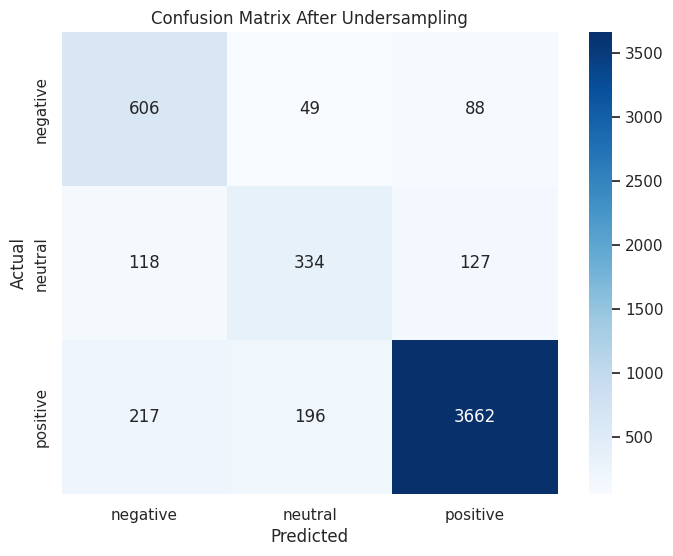

In [106]:

# Separate the classes
negative_class = data[data['sentiment'] == 'negative']
neutral_class = data[data['sentiment'] == 'neutral']
positive_class = data[data['sentiment'] == 'positive']

# Check class sizes
print("Class sizes before undersampling:")
print(f"Negative: {len(negative_class)}, Neutral: {len(neutral_class)}, Positive: {len(positive_class)}")

# Undersample the positive class to match the size of the neutral class
positive_class_undersampled = resample(positive_class,
                                       replace=False,  # Sampling without replacement
                                       n_samples=4000,  # Undersample the Positive Class
                                       random_state=42)  # For reproducibility

# Combine the balanced classes
balanced_data = pd.concat([negative_class, neutral_class, positive_class_undersampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class sizes after undersampling
print("Class sizes after undersampling:")
print(balanced_data['sentiment'].value_counts())

# Split into features and target
X_balanced = balanced_data['reviews']
y_balanced = balanced_data['sentiment']

# Re-train the fine-tuned SVM model
best_svm_pipeline.fit(X_balanced, y_balanced)

# Evaluate the re-trained model
y_val_pred_balanced = best_svm_pipeline.predict(X_val)

# Classification report and confusion matrix
# Classification report
print("Classification Report (After Undersampling):\n")
print(classification_report(y_val, y_val_pred_balanced))

# Confusion matrix
balanced_cm = confusion_matrix(y_val, y_val_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(balanced_cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_pipeline.classes_, yticklabels=best_svm_pipeline.classes_)
plt.title("Confusion Matrix After Undersampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion_Matrix_Balanced_SVM.png")
plt.show()


**Positive Class**
- Precision: Slight improvement (from 0.96 to 0.98) after undersampling, meaning there were fewer false positives.
- Recall: Decreased slightly (from 0.85 to 0.81), indicating that the model captured slightly fewer true positives from the positive class after undersampling.
- The undersampling caused a small trade-off in recall but improved precision.
- F1-score: A minor drop (from 0.90 to 0.88), reflecting a balance between precision and recall.

**Neutral Class**
- Precision: Improved marginally (from 0.43 to 0.45).
- Recall: Significant improvement (from 0.65 to 0.78), meaning the model performed better at identifying true neutral instances post-undersampling, a significant boost in recall.
- F1-score: Noticeable improvement (from 0.51 to 0.57).

**Negative Class**
- Precision: Slight decrease (from 0.66 to 0.64).
- Recall: Improved significantly (from 0.80 to 0.87), showing better identification of true negatives after undersampling.
- F1-score: A minor improvement (from 0.73 to 0.74).

Overall, while accuracy dropped slightly, the macro average scores improved, highlighting better balance across classes. This is especially critical when addressing class imbalance.

The undersampling approach prioritized fairness across classes, slightly sacrificing performance on the majority class (positive) for better results in the minority classes.

### Next Steps
Train the undersampled dataset using adavanced modeling methods such as LSTM